# 481 assignment 1

Gisu Ham  
10134838

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
import time
import random

# 1. Tuple vs List

Consider definitions provided by the python document   (https://docs.python.org/3/library/stdtypes.html#sequence-types-list-tuple-range)

Def: Lists are mutable sequences, typically used to store collections of homogeneous items (where the precise degree of similarity will vary by application).

Def: Tuples are immutable sequences, typically used to store collections of heterogeneous data (such as the 2-tuples produced by the enumerate() built-in). Tuples are also used for cases where an immutable sequence of homogeneous data is needed (such as allowing storage in a set or dict instance).

By these definitions, modifying tuples involve destroying and recreating another tuple with a new object id while lists can be tweaked while keeping its object id, making it more dynamic

Pretty straight forward, but the rest of the definitions are really ambiguous. The definitions suggest tuples are typically used to store heterogeneous items while lists typically contain homogeneous items.

The key word here is the 'typically'. Python surely allows lists to be just as heretogeneous as tuples, that is, [ (2,3), 'name', [3, 4, 5], 3.1415 ] is a valid list, and vice versa. Because of how flexible both lists and tuples are (and python in general), usually, in common coding practice, the two are completely interchangeable. One can be used in place of another without any difficulty unless some functions in module specifically requires one of the two. While its true that functions return tuple by default when  returning multiple objects, lists can be used to fulfill such requirement just as easily.

However, efficiency-wise, in general, Python interpretor takes less time when working with tuples compared to lists.

# 2.
Writing overhand function is pretty straight forward

In [15]:

def overhand(deck,blocksize=8):
    """This function shuffles according to the overhand shuffle rule with
    pre-defined static blocksize.
    
    args:
        deck (python list): ordered card of order 52
        blocksize (integer): number of cards to be moved in each step. default=8
        
    returns:
        deckbottom (python list): shuffled card
    
    algorithm:
    0. apply division algorithm: (52=blocksize*N+remainder)
    
    1. split the card into two packs.
        bottom: remainder (52 mod blocksize) 
        top : rest of the card
        
    2. for N number of times, stack the 'top' of the top deck onto the top of the bottom deck in blocksize in discrete.
        """
    
    remainder=52%blocksize
    num_blocks=(52-remainder)/blocksize
    
    #num_blocks better be integer (or rather, float with .0)
    assert num_blocks==int(num_blocks)
    
    #split
    deckbottom=deck[:remainder]
    decktop=deck[remainder:]
    
    for i in range(int(num_blocks)):
        to_append=decktop[i*10:i*10+10]
        for i in reversed(to_append):
            deckbottom.insert(0,i)
            
    return deckbottom


# 3.
running the overhand function 7 times

In [16]:
deck=list(range(52))
for i in range(7):
    deck=overhand(deck,blocksize=7)

In [17]:
deck

[51,
 33,
 48,
 49,
 31,
 32,
 44,
 45,
 41,
 36,
 43,
 39,
 40,
 21,
 22,
 42,
 23,
 24,
 50,
 46,
 47,
 29,
 30,
 10,
 11,
 13,
 14,
 34,
 35,
 37,
 38,
 18,
 19,
 20,
 7,
 3,
 4,
 25,
 26,
 6,
 27,
 28,
 1,
 2,
 17,
 12,
 0,
 15,
 16,
 8,
 9,
 5]

The disorder of the cards is certainly dependent on the blocksize. But even after 7 shuffles, there are residues of order amongst the chaos, that is, numberious sequences of N, N+1 are observed between the neighboring cards.

Such sequence is less frequenct as I increase the number of iteration. For example, for 17 iterations, I get

In [20]:
deck=list(range(52))
for i in range(17):
    deck=overhand(deck,blocksize=7)
deck

[36,
 32,
 47,
 45,
 49,
 31,
 48,
 24,
 40,
 35,
 33,
 43,
 39,
 21,
 22,
 51,
 42,
 23,
 41,
 50,
 46,
 29,
 30,
 1,
 10,
 13,
 14,
 44,
 34,
 37,
 38,
 8,
 18,
 19,
 17,
 7,
 3,
 25,
 26,
 2,
 6,
 27,
 5,
 20,
 16,
 11,
 9,
 0,
 15,
 12,
 28,
 4]

For riffle_shuffle however, 7 iterations preserve many orders with little chaos

In [24]:
def riffle_shuffle(deck):
    """ This function changes the order of a sequence
    by dividing it into two sections and merging them
    like shuffling a deck of cards.
    
    borrowed from Dr. jackel
    """
    ncards = len(deck)
    assert( (ncards %2) == 0 )
    #assert( ncards == 52 )
    
    nhalf = ncards//2
    half0 = deck[0:nhalf]
    half1 = deck[nhalf:]
    result = []
    
    for indx in range( nhalf ):
        result.append( half0[indx] )
        result.append( half1[indx] )
    return result

    deck = range(52)[:]
    deck = riffle_shuffle(deck)
    print(deck)
    assert( deck[0:4] == [0,26,1,27] )


In [25]:
deck_riffle=list(range(52))
for i in range(7):
    deck_riffle=riffle_shuffle(deck_riffle)

In [26]:
deck_riffle

[0,
 2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 18,
 20,
 22,
 24,
 26,
 28,
 30,
 32,
 34,
 36,
 38,
 40,
 42,
 44,
 46,
 48,
 50,
 1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49,
 51]

# 4.


First I 'borrow' the catmap1, catmap 2 from the document 

In [27]:
 def catmap1(square):
    """Apply Arnold's cat map to a square NxN numpy array
    using loops to modify pixels one at a time.
    """
    
    nx,ny = square.shape[0:2]
    assert (nx == ny & ny > 1)
    
    result = square.copy()
    for x in range(nx):
        for y in range(ny):
            xx = x + y
            yy = x + 2*y
            result[x,y] = square[xx % nx, yy % ny]
    
    return result


def catmap2(square):
    """
    Apply Arnold's cat map to a square NxN numpy array
    using array indexing.
    """
    
    nx,ny = square.shape[0:2]
    assert (nx == ny & ny > 1)
    x, y = np.arange(nx), np.arange(ny)
    xx, yy = np.meshgrid(x, y, sparse=False, indexing='ij')
    xx = xx + yy
    yy = yy + xx
    
    return square[xx % nx, yy % ny]


import module that makes image processing easy

In [28]:
from PIL import Image
import requests
from io import BytesIO

image_url=r"http://www.jasondavies.com/catmap/catmap.jpg"
response=requests.get(image_url)
img=Image.open(BytesIO(response.content))

Jupyter notebook seems to recognize PIL and display the image of a cute cat when I simply input the variable img onto the notebook

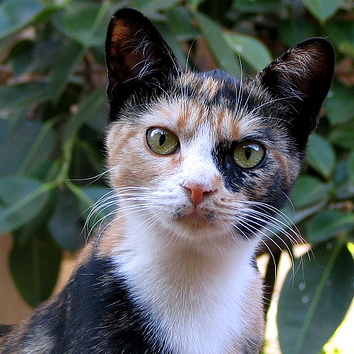

In [29]:
img

In [30]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

converting img into an array allows further examination in a data type we understand

In [31]:
data=np.array(img)

which has a dimension N,N,3 where the third dimension is for the RGB color

In [32]:
data.shape

(354, 354, 3)

I've seen people use timeit function of module time to measure function times, but I try to avoid using built-in functions as much as possible. Thus I use more primitve approach by simply measuring time between two points: begin,end

In [33]:
def measure_time_catmap_1(number_of_trials=10):
    """measures the average time it takes to run catmap_1
        
        args:
            number_of_trials(integer): number of trials we run. default=10
            
        return:
            time_acc/number_of_trials (float): average time it takes to
                                                process the function"""
    
    
    
    time_acc=0.0
    for i in range(number_of_trials):
        begin=time.time()
        catmap1(data)
        end=time.time()
        
        time_acc+=(end-begin)
    return time_acc/number_of_trials

def measure_time_catmap_2(number_of_trials=10):
    """measures the average time it takes to run catmap_2
        
        args:
            number_of_trials(integer): number of trials we run. default=10
            
        return:
            time_acc/number_of_trials (float): average time it takes to
                                                process the function"""
    time_acc=0.0
    for i in range(number_of_trials):
        begin=time.time()
        catmap2(data)
        end=time.time()
        
        time_acc+=(end-begin)
    return time_acc/number_of_trials

I run the functions above several times, each with different number of trials to have good sample size.

In [34]:
for i in range(10,100,10):
    print( measure_time_catmap_1(number_of_trials=i)," seconds")

0.09556646347045898  seconds
0.09471853971481323  seconds
0.09523553053538004  seconds
0.09581718444824219  seconds
0.09541435241699218  seconds
0.09557117223739624  seconds
0.09466160365513393  seconds
0.09450482726097106  seconds
0.09519389205508762  seconds


In [35]:
for i in range(10,100,10):
    print( measure_time_catmap_2(number_of_trials=i)," seconds")

0.005303645133972168  seconds
0.00407792329788208  seconds
0.004567837715148926  seconds
0.004068183898925781  seconds
0.004714508056640625  seconds
0.004552129904429118  seconds
0.004182083266122001  seconds
0.004333877563476562  seconds
0.004299441973368327  seconds


It's clear that catmap_2 is the more time-efficient of the two.

# 5.
I write temporal_identity function to calculate the length of cycle of each different square. Each entries of the square is $i*j$ of matrix $M_{ij}$ I raise error when no cycle is observed upto some threshold (1000 iterations)

In [38]:
def temporal_identity(N):
    """finds the number of iterations required to map NxN image onto itself
    using the catmap.
    
    If the cyclic behavior is not obtained within the max iteration=1000, raise
    valueerror
    
    args:
        N (int): dimension of the square matrix
    returns:
        i(int): number of iterations"""
    
    t=np.arange(N)
    x,y=np.meshgrid(t,t)
    NN=x*y
    original_NN=NN.copy()
    

    
    for i in range(1000):
        NN=catmap2(NN)
        if np.all(NN==original_NN):
            return i
        
    raise ValueError("Max iteration reached=1000")

tabulating the result for $N\in [2,20]\subseteq Z$

In [41]:
import tabulate

tabulate_results=[]
for i in range(2,21):
    tabulate_results.append([i,temporal_identity(i)])
print(tabulate.tabulate(tabulate_results,headers=['N','Length of Cycle']))

  N    Length of Cycle
---  -----------------
  2                  2
  3                  3
  4                  2
  5                  9
  6                 11
  7                  7
  8                  5
  9                 11
 10                 29
 11                  4
 12                 11
 13                 13
 14                 23
 15                 19
 16                 11
 17                 17
 18                 11
 19                  8
 20                 29


Now for $N\in [2,256] \subseteq Z$ where I plot instead of tabulating

In [44]:
N_list=np.arange(2,257)
LOC=[]
for i in range(2,257):
    LOC.append(temporal_identity(i))

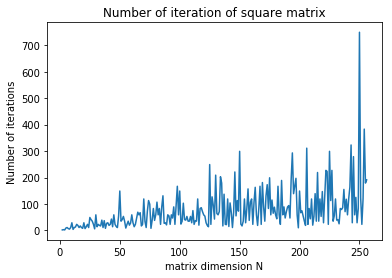

In [45]:
fig,ax=plt.subplots()
ax.plot(N_list,LOC)
plt.title("Number of iteration of square matrix")
plt.xlabel("matrix dimension N")
plt.ylabel("Number of iterations")
plt.show()

When I see something that even resembles a wave, it is my natural instinct to run FFT. FFT I do here is not complete because I do not properly convert the x axis because I don't know how yet.

In [23]:
a=np.fft.fft(LOC)

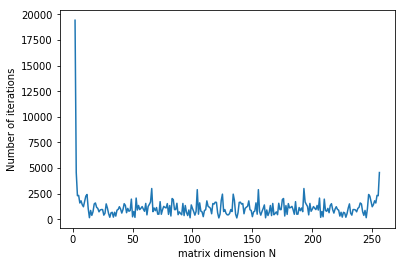

In [30]:
plt.plot(N_list,abs(a))
plt.xlabel("matrix dimension N")
plt.ylabel("Number of iterations")
plt.show()

I don't observe anything remakrable about the result, but it is somewhat evenly distributed